# Good Apples

## Introduction

This dataset was found on kaggle at https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality?resource=download

The data describes the different variables that are associated with the evaluation of a 'good' or 'bad' apple. This includes the following variables:

1. **A_id**: Unique identifier for each fruit
2. **Size**: Size of the fruit
3. **Weight**: Weight of the fruit
4. **Sweetness**: Degree of sweetness of the fruit
5. **Crunchiness**: Texture indicating the crunchiness of the fruit
6. **Juiciness**: Level of juiciness of the fruit
7. **Ripeness**: Stage of ripeness of the fruit
8. **Acidity**: Acidity level of the fruit
9. **Quality**: Overall quality of the fruit - **Outcome variable**

## Data Preparation

#### Importing relevant packages 


In [6]:
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# If you're working in Jupyter Notebook, include the following so that plots will display:
%matplotlib inline

### Overview on data

In [18]:
df = pd.read_csv('apple_quality.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


#### Dealing with nulls and formatting
There is an inconsistency in the data where *acidity* has an extra value. To address this I have located the rows that contain nulls.

In [20]:
nan_rows = df[df.isnull().any(axis=1)]
nan_rows

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


It seems that the final row has a signature from the dataset creator. This will be removed.

In [22]:
df = df.iloc[0:4000]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


This data now seems to be consistent but for my OCD I have to make the *A_id* column an integer.

In [26]:
df['A_id'] = df['A_id'].astype('int')
np.dtype(df['A_id'])

dtype('int32')

### Addressing assumptions

#### Quality of input features
Random Forest assumes that input features are relevant and informative for the prediction task. If features are **noisy, irrelevant, or contain biases**, the model's performance may degrade.

This assumption can be evaluated by the concepts that are being incorporated to predict a 'good' or 'bad' apple. **What defines a good apple?** 

- Is a good apple large? Small? or is there an optimal medium? Is it sweet? Crunchy? Sour? 

After looking over the variables, it seems that they generally descibe the factors that contribute to an apples quality (subject to personal prefernece of course). The only thing that may be missing is the concept of apple health -  blemishes, wear & tear, rotting,. etc. Though, this is possibly wrapped into other features such as ripeness and crunchiness.

##### Relevancy - The features appear conceptually relevant

##### Noise - Based on the correlation matrix below there isn't flagrant multicollinearity  

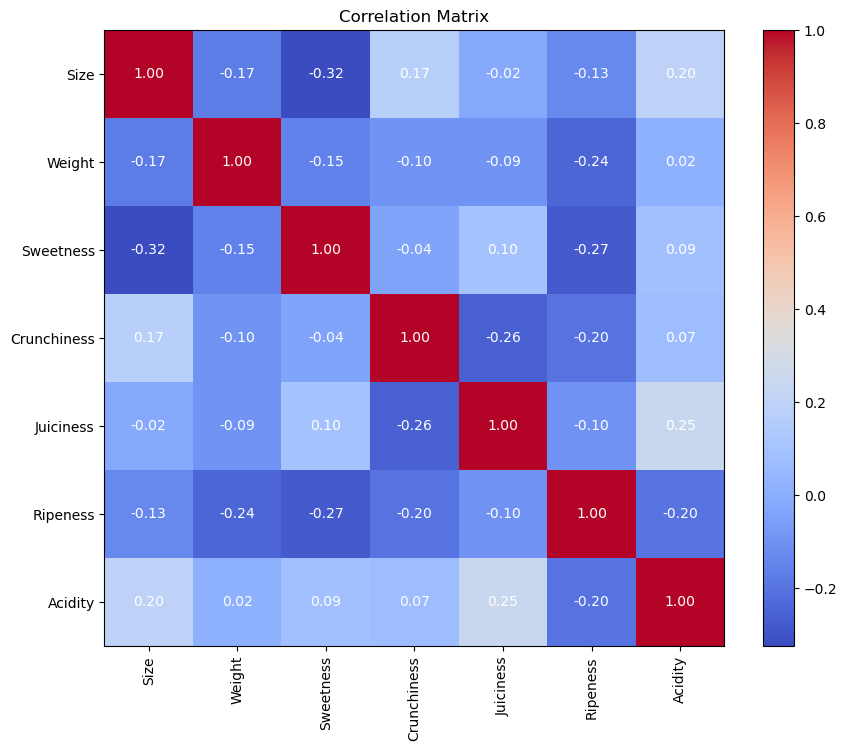

In [45]:
predict_corr = df[['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']].corr()

plt.figure(figsize=(10, 8))
plt.imshow(predict_corr, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(predict_corr)), predict_corr.columns, rotation=90)
plt.yticks(range(len(predict_corr)), predict_corr.columns)
plt.title('Correlation Matrix')

for i in range(len(predict_corr)):
    for j in range(len(predict_corr)):
        plt.text(j, i, f'{predict_corr.iloc[i, j]:.2f}', ha='center', va='center', color='white')


plt.show()

#### Balance of data set

Random Forest performs well on balanced datasets where each class or target value is adequately represented. Imbalanced datasets can lead to biased models that favor the majority class.

In [47]:
pd.DataFrame(df['Quality'].value_counts())

,count
Quality,
good,2004
bad,1996


There doesn't appear to be wild bias in how the classes of the outcome variable; approximately a 50/50 split. This suggests that the accuracy of interpreting both classes will be similar.

#### Homogeneous feature importance
Random Forest assumes that the importance of features remains consistent across the dataset. If feature importance varies significantly across different subsets of data, the model may not generalize well.